In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as axs

sns.set()


In [2]:
# REad the data 
df = pd.read_csv("{}/crimes.csv".format(os. getcwd()),
                delimiter= '\t',
                dtype={
                "CrimeID" :str, 
                "beat" : str, 
                "iucr" : str, 
                "district" : str, 
                "casenumber" : str,
                "date": str,
                "block": str,
                "location": str
                }
                )
None

/tmp/ipykernel_32793/3899472257.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("{}/crimes.csv".format(os. getcwd()),


In [3]:
df.head(-1)


,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
0,1,JA118920,01/01/2017 01:00:00 AM,023XX N WAYNE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,false,1811,18,41.924198,-87.662071,"(41.924196311, -87.662069166)"
1,2,JA100052,01/01/2017 01:00:00 AM,090XX S BLACKSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,true,413,4,41.730709,-87.587997,"(41.730707788, -87.587998843)"
2,3,JA100367,01/01/2017 01:00:00 AM,049XX N WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,1713,17,41.970776,-87.704872,"(41.97077465, -87.704873143)"
3,4,JA100092,01/01/2017 01:00:00 AM,023XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,false,1034,10,41.848907,-87.695366,"(41.848905706, -87.695364781)"
4,5,JA494707,01/01/2017 01:00:00 AM,032XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,false,1732,17,41.940193,-87.725647,"(41.940192486, -87.725649965)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730894,730746,JF102101,12/31/2021 12:30:00 PM,005XX W 37TH ST,0820,THEFT,$500 AND UNDER,STREET,False,915,9,41.827190,-87.639450,"(41.82718996, -87.639447402)"
730895,730747,JE493505,12/31/2021 12:38:00 AM,005XX E 32ND ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE - YARD (FRONT / BACK),False,211,2,41.836071,-87.612816,"(41.83607107, -87.612813156)"
730896,730748,JE493511,12/31/2021 12:41:00 AM,038XX W 68TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,833,8,41.768700,-87.718941,"(41.76870088, -87.718942599)"
730897,730749,JF100517,12/31/2021 12:41:00 PM,038XX W 83RD PL,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,834,8,41.741333,-87.717537,"(41.741332605, -87.717536356)"


Task 1: 
possible questions to investigate;

THe main task of this DB is to provide a FAIR implementation of descriptive statistics; possible to set up for further use for advanced analytics (predictive)

TODO: perform the EDA and data cleaning describe each level; so first do level 1.. describe what you do and find there... further motivate why you go with certain questions to level 2 and then motivate why you answer a specific question in question 3

For data understanding:
1. Is block properly randomized with the location (lat lon)? So does the lcoation really correspond with the block desciripn
2. is the police district more relevant 

General description:
there are 4 types of data groups: a) location data, b) atrest or not, c) type of crime, d) time component

EDA:
I) Frist level (simple)
1. crimes grouped by type (there are two types one primary one secondary)
    --> look for prevaleence of a certain types of crimes
    --> this may need the most cleaning of all 
    --> possibly gorup certain types of crimes into overarching groups
    --> level 1 vs level 2 (the two differernt types of crimes pitted against each other)
    --> WHICH CATEGORY (TYPE 1) is most prevalent --> type 1 is most relevant as it is less granular
    --> group crimes with an index!; or index data by 
2. Location: simple plotting and exploration of what different types of districts exist in the first place
    --> do not go into depth here; just look at the location
    --> as every row should pertain to a crime, this means that every instance is just another instance of frequency of crime; so make a barchart of the different districts/beat to see where are the msot crimes perpetrated (irregardless of type of crime)
    --> index data by devere districts 
    --> plot the lcoation of the data 



IMPORTANT: CASE NUMBERS ARE UNIQUE! MAYBE WE CAN SEE TOTALS THIS WAY OR GROUP BASED ON CASE NUMBER TO REDUCE THE AMOUNT OF DATA; 

II) Joint Distribtuin questions 
1. Crime by time (different types)
    --> Sesonality patterns?
    --> change over time in terms of years/months
    --> Time of day

2. Crime by location (different types)
    --> where do certain types of crime happen the most?
    --> what crime type happens where the most; eg in what district do we see most homcides etc

3. Crime by arrest



4. Location by arrest (racial problems? Idk we are a woke school; think about the professor.. she is )


III) advanced
Main questions:
- do crime patterns change over time; WHere and when? SO that the police can focus on areas by sesonality 
1. Crime



1. Crimetype by time by arrest 

2. crimes grouped by arrest
3. crimes by location description
4. crimes by BEAT/ location description/ district 
5. Crime by lon/lat 


WHAT ABOUT RATIOS ETC? SUCH THAT SEXUAL TO BATTERY ETC; or assault to battery


## Level 1; univariate inspection of Variables
#### Find mistakes in the variables; nan; etc and establish a general feel for the data 

### Inspect missing values 

In [4]:
df.isna().sum().sum()

38202

In [5]:
df.isna().sum()

CrimeID                    0
casenumber                 3
date                       2
block                      0
iucr                       3
primarytype                3
description                3
locationdescription     3434
arrest                     3
beat                       3
district                   3
latitude               11583
longitude              11581
location               11581
dtype: int64

In [6]:
# those with missing casenumbers are unworkable in the first case 
# so these have to be removed
df.drop(df[df.casenumber.isna()].index, 
                                axis = 0, 
                                inplace = True)


In [7]:
df.isna().sum()

CrimeID                    0
casenumber                 0
date                       0
block                      0
iucr                       0
primarytype                0
description                0
locationdescription     3431
arrest                     0
beat                       0
district                   0
latitude               11580
longitude              11580
location               11580
dtype: int64

In [8]:
# the location description missing seems to be fine as most other data is not missing
df[df.locationdescription.isna()]

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
16,14,JA295517,01/01/2017 01:00:00 AM,001XX E WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,114,1,41.888191,-87.623779,"(41.888189539, -87.623777956)"
17,14,JA295517,01/01/2017 01:00:00 AM,001XX E WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,114,1,41.888191,-87.623779,"(41.888189539, -87.623777956)"
98,60,JA293984,01/01/2017 01:40:00 PM,026XX N LAKEVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,1935,19,41.930336,-87.639290,"(41.930334169, -87.639289833)"
134,96,JD155524,01/01/2017 02:20:00 PM,019XX S SPRINGFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,1014,10,NaN,NaN,NaN
209,171,JC382852,01/01/2017 04:05:00 PM,008XX S INDEPENDENCE BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,1133,11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729175,729027,JF219278,12/30/2021 12:00:00 AM,055XX N NORMANDY AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,1613,16,NaN,NaN,NaN
729800,729652,JC282350,12/31/2018 10:15:00 AM,011XX N MASON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,1511,15,NaN,NaN,NaN
730208,730060,JD115927,12/31/2019 12:10:00 PM,050XX S PRAIRIE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,224,2,41.803421,-87.619446,"(41.803419975, -87.619443526)"
730228,730080,JC566118,12/31/2019 12:50:00 AM,122XX S PRINCETON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,523,5,41.671860,-87.629692,"(41.671857853, -87.629690944)"


In [9]:
# the location is a set of lat, lon data
# it appears to be neglible 
# no removal needed at this point
df[df.location.isna()]

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
6,7,JC456595,01/01/2017 01:00:00 AM,015XX W 19TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,false,1235,12,NaN,NaN,NaN
34,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN
35,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN
134,96,JD155524,01/01/2017 02:20:00 PM,019XX S SPRINGFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,false,1014,10,NaN,NaN,NaN
166,128,JB356747,01/01/2017 03:00:00 PM,057XX S GREEN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,false,712,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730883,730735,JF129328,12/31/2021 12:01:00 AM,064XX S KENWOOD AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,314,3,NaN,NaN,NaN
730884,730736,JF126961,12/31/2021 12:01:00 AM,022XX W 54TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,932,9,NaN,NaN,NaN
730888,730740,JF155537,12/31/2021 12:20:00 PM,096XX S UNION AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,2223,22,NaN,NaN,NaN
730889,730741,JF100299,12/31/2021 12:25:00 AM,020XX N WOLCOTT AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE,False,1432,14,NaN,NaN,NaN


### Inspect data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730897 entries, 0 to 730899
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CrimeID              730897 non-null  object 
 1   casenumber           730897 non-null  object 
 2   date                 730897 non-null  object 
 3   block                730897 non-null  object 
 4   iucr                 730897 non-null  object 
 5   primarytype          730897 non-null  object 
 6   description          730897 non-null  object 
 7   locationdescription  727466 non-null  object 
 8   arrest               730897 non-null  object 
 9   beat                 730897 non-null  object 
 10  district             730897 non-null  object 
 11  latitude             719317 non-null  float64
 12  longitude            719317 non-null  float64
 13  location             719317 non-null  object 
dtypes: float64(2), object(12)
memory usage: 83.6+ MB


In [11]:
df.loc[df.arrest == "true", "arrest"] = True
df.loc[df.arrest == "false", "arrest"] = False

In [12]:
# missing information in arrest
df[ ~((df.arrest == True) | (df.arrest == False))].head()
df.arrest.value_counts(dropna = False)

False    597601
True     133280
             16
Name: arrest, dtype: int64

#### Problematic datatypes and values forthe following columns
- beat; beat is porblematic -- the default length should be 4 but it is most of the time not
- district; district might not be severe as this might correspond to the district_num

as it seems to me, the first element(s) of each beat identify the district; if the district has a length of 2 (eg district 12), then the beat starts with "12"

But this is not completely the ase for district "19"

In [13]:
test = df[df.district == "19"]
test.head()

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
8,9,JA105454,01/01/2017 01:00:00 AM,027XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,1935,19,41.932266,-87.648994,"(41.932266737, -87.648996818)"
9,10,JA100684,01/01/2017 01:00:00 AM,011XX W WELLINGTON AVE,0479,BATTERY,AGG: HANDS/FIST/FEET SERIOUS INJURY,RESIDENCE,True,1933,19,41.936226,-87.656975,"(41.936227262, -87.656973999)"
89,51,JA101582,01/01/2017 01:30:00 AM,033XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,1924,19,41.943108,-87.649368,"(41.943108594, -87.649366085)"
98,60,JA293984,01/01/2017 01:40:00 PM,026XX N LAKEVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,1935,19,41.930336,-87.639290,"(41.930334169, -87.639289833)"
99,61,JA100114,01/01/2017 01:45:00 AM,042XX N DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE PORCH/HALLWAY,True,1911,19,41.958969,-87.678894,"(41.958969376, -87.678896199)"


In [14]:
test[(test.beat.str[:2] == "19")].head()

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
8,9,JA105454,01/01/2017 01:00:00 AM,027XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,1935,19,41.932266,-87.648994,"(41.932266737, -87.648996818)"
9,10,JA100684,01/01/2017 01:00:00 AM,011XX W WELLINGTON AVE,0479,BATTERY,AGG: HANDS/FIST/FEET SERIOUS INJURY,RESIDENCE,True,1933,19,41.936226,-87.656975,"(41.936227262, -87.656973999)"
89,51,JA101582,01/01/2017 01:30:00 AM,033XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,1924,19,41.943108,-87.649368,"(41.943108594, -87.649366085)"
98,60,JA293984,01/01/2017 01:40:00 PM,026XX N LAKEVIEW AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,1935,19,41.930336,-87.639290,"(41.930334169, -87.639289833)"
99,61,JA100114,01/01/2017 01:45:00 AM,042XX N DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE PORCH/HALLWAY,True,1911,19,41.958969,-87.678894,"(41.958969376, -87.678896199)"


In [15]:
test[~(test.beat.str[:2] == "19")].head()

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location
465542,465504,JB402182,08/21/2018 01:40:00 AM,014XX N WELLS ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,BAR OR TAVERN,False,1821,19,41.934681,-87.636703,"(41.93467909, -87.636706827)"
631683,631535,JE207675,11/09/2017 12:00:00 AM,051XX W DRUMMOND PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,STREET,False,2521,19,41.935970,-87.674805,"(41.935971426, -87.674805554)"


In [16]:
# when checking for the correct format of iucr we can conclude that this value was correctly imported as "0" values as first element still exist
df[df.iucr == "031B"].head()
df[df.iucr == "051A"].head()

'''
When looking at the different "iucr" crime codes we can identify that 
the resuting categories somewhat correspond with the real code violations 
which are described by "iucr" (total of ~430; we obtain 343); consider 
that not every code violation is actually perpetrated as some of them 
are very unlikeyl to happen in the first place 
'''

df.iucr.value_counts(dropna= False)




0486    67136
0820    63651
0460    43123
0810    41355
1310    38916
        ...  
1510        1
3751        1
1520        1
1530        1
5122        1
Name: iucr, Length: 343, dtype: int64

In [17]:
df[df.iucr.str.contains("NaN")]

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location


In [18]:
df.locationdescription.value_counts(dropna= False)

STREET                 167541
RESIDENCE              123234
APARTMENT              110480
SIDEWALK                52679
OTHER                   20319
                        ...  
LIQUOR STORE                1
GOVERNMENT BUILDING         1
CHA ELEVATOR                1
YMCA                        1
CTA SUBWAY STATION          1
Name: locationdescription, Length: 181, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730897 entries, 0 to 730899
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CrimeID              730897 non-null  object 
 1   casenumber           730897 non-null  object 
 2   date                 730897 non-null  object 
 3   block                730897 non-null  object 
 4   iucr                 730897 non-null  object 
 5   primarytype          730897 non-null  object 
 6   description          730897 non-null  object 
 7   locationdescription  727466 non-null  object 
 8   arrest               730897 non-null  object 
 9   beat                 730897 non-null  object 
 10  district             730897 non-null  object 
 11  latitude             719317 non-null  float64
 12  longitude            719317 non-null  float64
 13  location             719317 non-null  object 
dtypes: float64(2), object(12)
memory usage: 83.6+ MB


In [20]:
# adjust the datatypes posthoc 
# CrimeID as first to integer value then to STRING

df = df.astype({"CrimeID":int, 
                "casenumber":str, 
                "block":str,
                "iucr":str,
                "primarytype":str,
                "description":str,
                "date": str,
                "beat": str,
                # I am leaving locationdescription out because the object type here is of no problem wrt. NaN
                # "locationdescription":str,
                "arrest": str})



In [21]:
# i just prefer an Id to be in STR so that no stupid things can be done to it
df = df.astype({"CrimeID":str})


In [22]:
df.date.astype(str)

0         01/01/2017 01:00:00 AM
1         01/01/2017 01:00:00 AM
2         01/01/2017 01:00:00 AM
3         01/01/2017 01:00:00 AM
4         01/01/2017 01:00:00 AM
                   ...          
730895    12/31/2021 12:38:00 AM
730896    12/31/2021 12:41:00 AM
730897    12/31/2021 12:41:00 PM
730898    12/31/2021 12:49:00 AM
730899    12/31/2021 12:55:00 AM
Name: date, Length: 730897, dtype: object

In [23]:
# now convert date 
df["date_time"] = pd.to_datetime(df.date.astype(str), 
                              errors="coerce")

In [24]:
df

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location,date_time
0,1,JA118920,01/01/2017 01:00:00 AM,023XX N WAYNE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,False,1811,18,41.924198,-87.662071,"(41.924196311, -87.662069166)",2017-01-01 01:00:00
1,2,JA100052,01/01/2017 01:00:00 AM,090XX S BLACKSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,413,4,41.730709,-87.587997,"(41.730707788, -87.587998843)",2017-01-01 01:00:00
2,3,JA100367,01/01/2017 01:00:00 AM,049XX N WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,1713,17,41.970776,-87.704872,"(41.97077465, -87.704873143)",2017-01-01 01:00:00
3,4,JA100092,01/01/2017 01:00:00 AM,023XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,1034,10,41.848907,-87.695366,"(41.848905706, -87.695364781)",2017-01-01 01:00:00
4,5,JA494707,01/01/2017 01:00:00 AM,032XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,1732,17,41.940193,-87.725647,"(41.940192486, -87.725649965)",2017-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730895,730747,JE493505,12/31/2021 12:38:00 AM,005XX E 32ND ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE - YARD (FRONT / BACK),False,211,2,41.836071,-87.612816,"(41.83607107, -87.612813156)",2021-12-31 00:38:00
730896,730748,JE493511,12/31/2021 12:41:00 AM,038XX W 68TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,833,8,41.768700,-87.718941,"(41.76870088, -87.718942599)",2021-12-31 00:41:00
730897,730749,JF100517,12/31/2021 12:41:00 PM,038XX W 83RD PL,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,834,8,41.741333,-87.717537,"(41.741332605, -87.717536356)",2021-12-31 12:41:00
730898,730750,JF100660,12/31/2021 12:49:00 AM,075XX S SEELEY AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,611,6,41.756420,-87.674522,"(41.756418241, -87.674522275)",2021-12-31 00:49:00


In [25]:
df[df.CrimeID == "23"]

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location,date_time
34,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN,NaT
35,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN,NaT


In [ ]:
df.loc[df.primarytype == "CRIM SEXUAL ASSAULT"] = "CRIMINAL SEXUAL ASSAULT"

In [26]:
# coercing the datetime format enables the search for NaN values in the date column
# lets make it explictit and change the integratet NaT to numpy values independent of a time object
df.loc[df[df["date_time"].isna()].index, "date_time"] = np.nan
df[df["date_time"].isna()]

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location,date_time
34,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN,NaT
35,23,JB235763,,016XX W PRATT BLVD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,,2432,24,NaN,NaN,NaN,NaT
161,123,JA100380,,078XX S MORGAN ST,0810,THEFT,OVER $500,RESIDENCE,,612,6,41.751896,-87.648926,"(41.751896943, -87.648926093)",NaT
360,322,JA469768,,076XX S VERNON AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,RESIDENCE,,624,6,41.755615,-87.613823,"(41.755615044, -87.613820045)",NaT
1161,1123,JB346519,,080XX S KEDVALE AVE,0553,ASSAULT,AGGRAVATED PO: OTHER DANG WEAP,STREET,,834,8,41.747280,-87.725410,"(41.747280312, -87.725413197)",NaT
1360,1322,JD348240,,078XX S WINCHESTER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,,611,6,41.751614,-87.671959,"(41.751611954, -87.671958451)",NaT
1544,1506,JC100965,,035XX W FLOURNOY ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,,1133,11,41.872681,-87.714066,"(41.872680029, -87.714066886)",NaT
11360,11322,JC107233,,012XX N HERMITAGE AVE,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),,1424,14,41.905903,-87.670692,"(41.905903969, -87.670691663)",NaT
11544,11506,JC106740,,025XX N DRAKE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,,1413,14,41.927116,-87.715836,"(41.92711605, -87.715837448)",NaT
15023,14985,JC109833,,077XX S YATES BLVD,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,,421,4,41.754723,-87.566292,"(41.754723038, -87.566292236)",NaT


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730897 entries, 0 to 730899
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CrimeID              730897 non-null  object        
 1   casenumber           730897 non-null  object        
 2   date                 730897 non-null  object        
 3   block                730897 non-null  object        
 4   iucr                 730897 non-null  object        
 5   primarytype          730897 non-null  object        
 6   description          730897 non-null  object        
 7   locationdescription  727466 non-null  object        
 8   arrest               730897 non-null  object        
 9   beat                 730897 non-null  object        
 10  district             730897 non-null  object        
 11  latitude             719317 non-null  float64       
 12  longitude            719317 non-null  float64       
 13  location      

In [28]:
df.isna().sum()

CrimeID                    0
casenumber                 0
date                       0
block                      0
iucr                       0
primarytype                0
description                0
locationdescription     3431
arrest                     0
beat                       0
district                   0
latitude               11580
longitude              11580
location               11580
date_time                 16
dtype: int64

In [29]:
df.reset_index(inplace=True, drop = True )

# Perform simple EDA as defined above
## Level 1:


Task 1: 
possible questions to investigate;

THe main task of this DB is to provide a FAIR implementation of descriptive statistics; possible to set up for further use for advanced analytics (predictive)

TODO: perform the EDA and data cleaning describe each level; so first do level 1.. describe what you do and find there... further motivate why you go with certain questions to level 2 and then motivate why you answer a specific question in question 3

For data understanding:
1. Is block properly randomized with the location (lat lon)? So does the lcoation really correspond with the block desciripn
2. is the police district more relevant 

General description:
there are 4 types of data groups: a) location data, b) atrest or not, c) type of crime, d) time component

EDA:
I) Frist level (simple)
1. crimes grouped by type (there are two types one primary one secondary)
    --> look for prevaleence of a certain types of crimes
    --> this may need the most cleaning of all 
    --> possibly gorup certain types of crimes into overarching groups
    --> level 1 vs level 2 (the two differernt types of crimes pitted against each other)
    --> WHICH CATEGORY (TYPE 1) is most prevalent --> type 1 is most relevant as it is less granular
    --> group crimes with an index!; or index data by 
2. Location: simple plotting and exploration of what different types of districts exist in the first place
    --> do not go into depth here; just look at the location
    --> as every row should pertain to a crime, this means that every instance is just another instance of frequency of crime; so make a barchart of the different districts/beat to see where are the msot crimes perpetrated (irregardless of type of crime)
    --> index data by devere districts 
    --> plot the lcoation of the data 



IMPORTANT: CASE NUMBERS ARE UNIQUE! MAYBE WE CAN SEE TOTALS THIS WAY OR GROUP BASED ON CASE NUMBER TO REDUCE THE AMOUNT OF DATA; 

II) Joint Distribtuin questions 
1. Crime by time (different types)
    --> Sesonality patterns?
    --> change over time in terms of years/months
    --> Time of day

2. Crime by location (different types)
    --> where do certain types of crime happen the most?
    --> what crime type happens where the most; eg in what district do we see most homcides etc

3. Crime by arrest



4. Location by arrest (racial problems? Idk we are a woke school; think about the professor.. she is )


III) advanced
Main questions:
- do crime patterns change over time; WHere and when? SO that the police can focus on areas by sesonality 
1. Crime



1. Crimetype by time by arrest 

2. crimes grouped by arrest
3. crimes by location description
4. crimes by BEAT/ location description/ district 
5. Crime by lon/lat 




### Level 1: Crime by type barcharts etc

1. crimes grouped by type (there are two types one primary one secondary)
    --> look for prevaleence of a certain types of crimes
    --> this may need the most cleaning of all 
    --> possibly gorup certain types of crimes into overarching groups
    --> level 1 vs level 2 (the two differernt types of crimes pitted against each other)
    --> WHICH CATEGORY (TYPE 1) is most prevalent --> type 1 is most relevant as it is less granular
    --> group crimes with an index!; or index data by 

In [31]:
df.head()

,CrimeID,casenumber,date,block,iucr,primarytype,description,locationdescription,arrest,beat,district,latitude,longitude,location,date_time
0,1,JA118920,01/01/2017 01:00:00 AM,023XX N WAYNE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,False,1811,18,41.924198,-87.662071,"(41.924196311, -87.662069166)",2017-01-01 01:00:00
1,2,JA100052,01/01/2017 01:00:00 AM,090XX S BLACKSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,413,4,41.730709,-87.587997,"(41.730707788, -87.587998843)",2017-01-01 01:00:00
2,3,JA100367,01/01/2017 01:00:00 AM,049XX N WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,1713,17,41.970776,-87.704872,"(41.97077465, -87.704873143)",2017-01-01 01:00:00
3,4,JA100092,01/01/2017 01:00:00 AM,023XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,1034,10,41.848907,-87.695366,"(41.848905706, -87.695364781)",2017-01-01 01:00:00
4,5,JA494707,01/01/2017 01:00:00 AM,032XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,1732,17,41.940193,-87.725647,"(41.940192486, -87.725649965)",2017-01-01 01:00:00


### Note: df_crime_type1 is suitable to be a view in the db

In [54]:
df_crime_type1 = pd.DataFrame(zip(df.primarytype.value_counts().index, df.primarytype.value_counts().values), columns = ["Type1", "count_Type1"])
df_crime_type2 = pd.DataFrame(zip(df.description.value_counts().index, df.description.value_counts().values), columns = ["Type2", "count_Type2"])

Text(0.5, 1.0, 'Count by crimetype1')

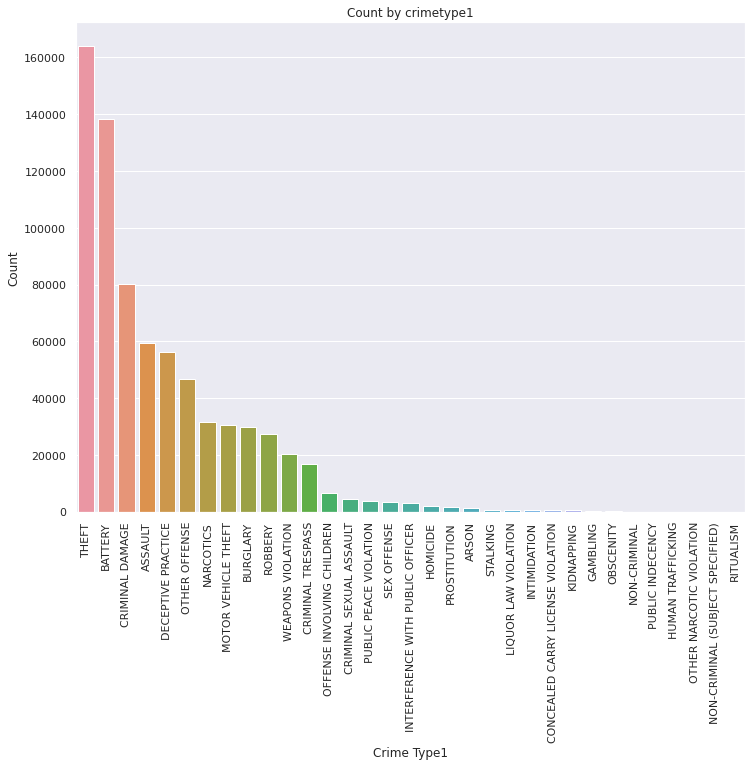

In [55]:
# type 1
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="Type1", y="count_Type1", data=df_crime_type1)

plt.xticks(rotation=90)
plt.xlabel("Crime Type1")
plt.ylabel("Count")
plt.title("Count by crimetype1")



Text(0.5, 1.0, 'Count by crimetype1')

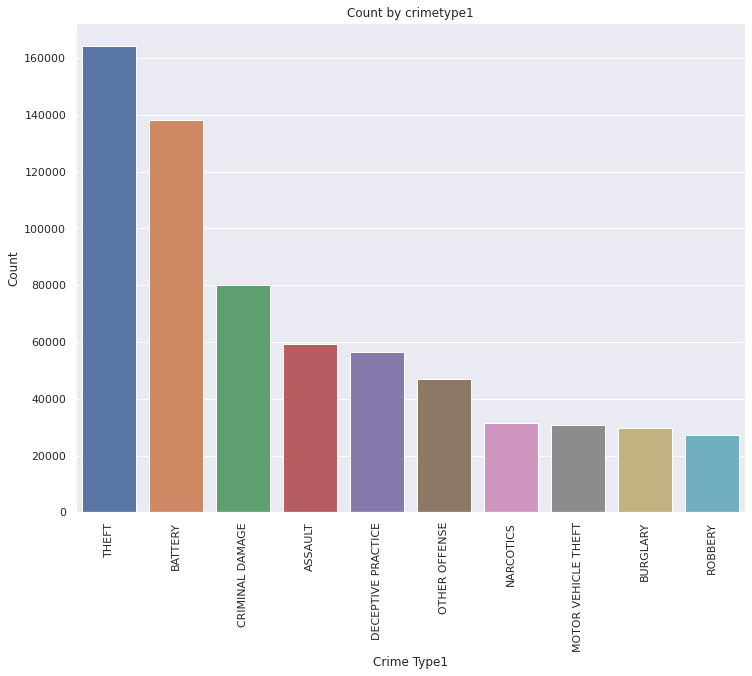

In [56]:
# only select the 10 most prevalent crime types
# type 1
plt.figure(figsize=(12, 9))
ax = sns.barplot(x="Type1", y="count_Type1", data=df_crime_type1.nlargest(10, "count_Type1"))

plt.xticks(rotation=90)
plt.xlabel("Crime Type1")
plt.ylabel("Count")
plt.title("Count by crimetype1")

Text(0.5, 1.0, 'Count by crimetype1')

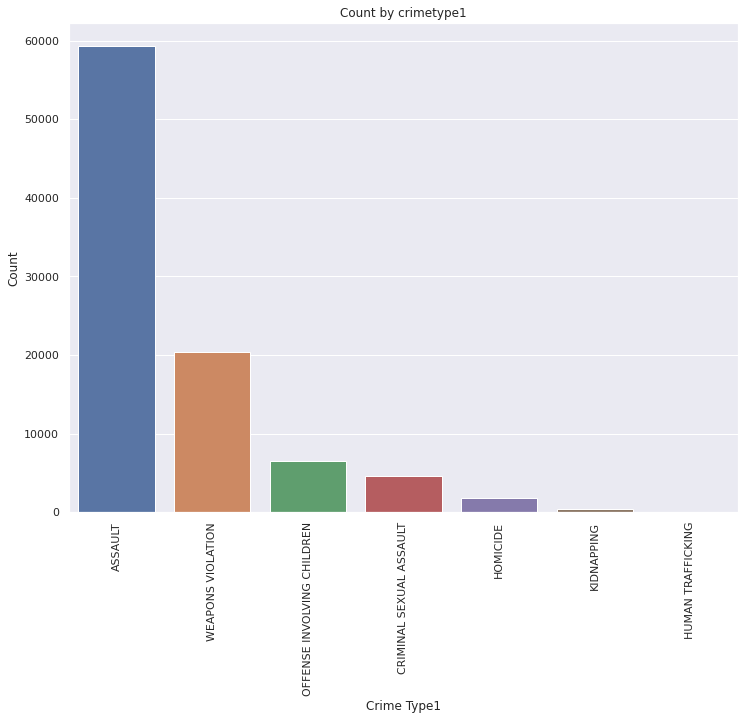

In [64]:
# now select only serious offenses

plt.figure(figsize=(12, 9))
ax = sns.barplot(x="Type1", y="count_Type1", data=df_crime_type1[df_crime_type1.Type1.isin(["ASSAULT", 
                                                                                            "KIDNAPPING", 
                                                                                            "CRIMINAL SEXUAL ASSAULT", 
                                                                                             "HOMICIDE", 
                                                                                            "HUMAN TRAFFICKING", 
                                                                                           "OFFENSE INVOLVING CHILDREN", 
                                                                                            "WEAPONS VIOLATION"])])

plt.xticks(rotation=90)
plt.xlabel("Crime Type1")
plt.ylabel("Count")
plt.title("Count by crimetype1")
